In [1]:
#https://moodle.utu.fi/pluginfile.php/2052782/mod_resource/content/4/Exercise%202.pdf

import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
a = pd.Series([5, 8, 7, 6, 7, 8])
b = pd.Series([1.3, 2.1, 1.7, 1.1, 1.4, 2.3])
c = pd.Series(['y', 'y', 'n', 'y', 'n', 'n'])
df = pd.concat([a, b, c], axis=1)
print(df)


   0    1  2
0  5  1.3  y
1  8  2.1  y
2  7  1.7  n
3  6  1.1  y
4  7  1.4  n
5  8  2.3  n


In [3]:
# assuming that numbers are one-based indices

# a)
print(df.iloc[2, 1], end="\n\n")

# b)
print(df.iloc[3,], end="\n\n")

# c)
print(df.iloc[1:5, -2:], end="\n\n")

# d)
print(df.transpose(), end="\n\n")

1.7

0      6
1    1.1
2      y
Name: 3, dtype: object

     1  2
1  2.1  y
2  1.7  n
3  1.1  y
4  1.4  n

     0    1    2    3    4    5
0    5    8    7    6    7    8
1  1.3  2.1  1.7  1.1  1.4  2.3
2    y    y    n    y    n    n



#### 2. Read the following two articles

Article 1: L.E. Juarez-Orozco et al., Machine learning in the integration of simple variables
for identifying patients with myocardial ischemia, PMID: 29790017

Article 2: W. He et al., High-salt diet inhibits tumour growth in mice via regulating myeloid-
derived suppressor cell differentiation, PMID: 32265505
and identify used variables. Especially, find out how many samples were used, and list all
variables and determine their type.

#### Article 1

N=1234 (patients)

Predictor variables are listed in Table 1, in which `+-` implies a numerical variable and `%` implies a categorical variable.

Numerical variables (12):
- age (years)
- BMI (kg/m2)
- Duke clinical score (0–100)
- rest HR (bpm)
- stress HR (bpm)
- % of max HR
- rest Systolic BP (mmHg)
- rest diastolic BP (mmHg)
- stress systolic BP (mmHg)
- stress diastolic BP (mmHg)
- rest LVEF (%)
- stress LVEF (%)

Categorical variables (9):
- female sex
- smoking
- diabetes
- dyslipidemia
- hypertension
- family history of CAD
- abnormal rest ECG
- abnormal stress ECG
- type of chest complaints
 
Outcome variables are categorical:
- myocardial ischemia
- elevated risk of MACE

#### Article 2

Based on the information from Fig. 1 and Fig. 2 only:

N=80 (mice) or N=40 (mice)

Binary (categorical) variables:
- gender (female or male)
- mouse type (C57BL/6J or BALB/C)
- food (NSD or HSD)

Numerical variables:
- tumor weight
- tumor diameter
- survival time
- content of Na+ and Cl- in six organs (12 variables)
- content of Na+, Cl- and K+ in serum (3 variables)
- content of Na+, Cl- and K+ in tumor (3 variables)
- osmolality for 7 organs (7 variables)

#### 3 This exercise deals with human heights (cm). Find out if the following data points are
normally distributed or not
170, 192, 184, 168, 176, 181, 163 ?

How about these
170, 170, 170, 170, 192, 192, 192, 192, 184, 184, 184, 184, 168, 168, 168, 168, 176, 176,
176, 176, 181, 181, 181, 181, 163, 163, 163, 163 

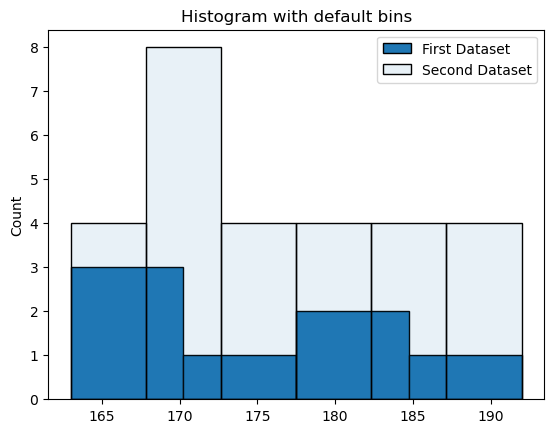

In [4]:
data1=[170, 192, 184, 168, 176, 181, 163]
df1=pd.DataFrame(data1)

data2=[170, 170, 170, 170, 192, 192, 192, 192, 184, 184, 184, 184, 168, 168, 168, 168, 176, 176, 176, 176, 181, 181, 181, 181, 163, 163, 163, 163 ]
df2=pd.DataFrame(data2)

sns.histplot(df1, label="First Dataset", alpha=1)
sns.histplot(df2, label="Second Dataset", alpha=0.1)
plt.legend()
plt.title("Histogram with default bins")
plt.show()

In [5]:
# 3

print("For first dataset,",end=" ")
if(stats.shapiro(df1)[1]>=0.05):
    print("by Shapiro Wilk test, It is normally distributed")
else:
    print("by Shapiro Wilk test, It is not normally distributed")
    

    
print("For second dataset,", end=" ")
if(stats.shapiro(df2)[1]>=0.05):
    print("by Shapiro Wilk test, It is normally distributed")
else:
    print("by Shapiro Wilk test, It is not normally distributed")
    
    

For first dataset, by Shapiro Wilk test, It is normally distributed
For second dataset, by Shapiro Wilk test, It is not normally distributed


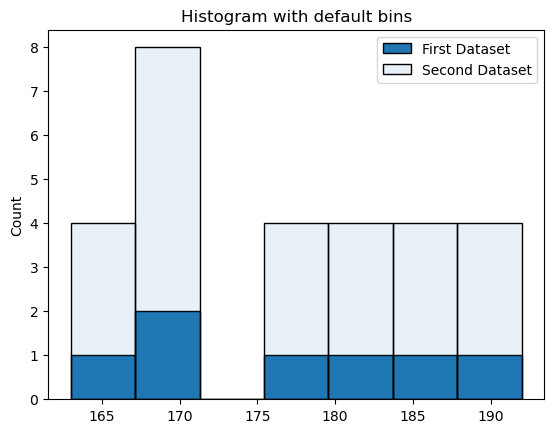

In [6]:
# 4

sns.histplot(df1, label="First Dataset", bins=7, alpha=1)
sns.histplot(df2, label="Second Dataset", bins=7, alpha=0.1)
plt.legend()
plt.title("Histogram with default bins")
plt.show()

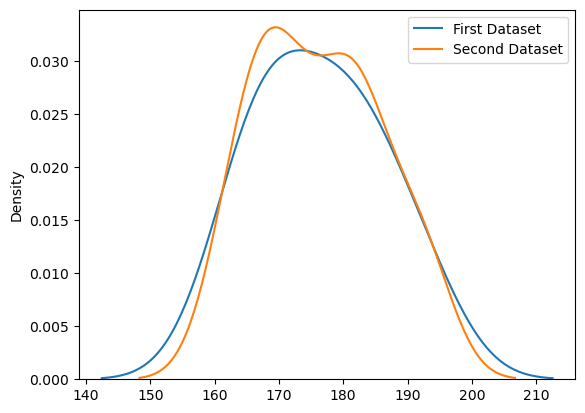

In [7]:
sns.kdeplot(data1,  label="First Dataset")
sns.kdeplot(data2,  label="Second Dataset")
plt.legend()
plt.show()

In [8]:
#world_temp_df=pd.read_csv("graph.txt.txt", header=None, sep="")
#world_temp_df
#open file1 in reading mode
file1 = open('graph.txt', 'r')

#open file2 in writing mode
file2 = open('graph_new.csv','w')

#read from file1 and write to file2
for line in file1:
    if ("---"  not in line) & ("Index" not in line) & (len(line)>1) & ("_" not in line):
        file2.write(line)

#close file1 and file2
file1.close()
file2.close()




In [9]:
graph_df=pd.read_csv("graph_new.csv",  index_col=None, delim_whitespace=True, names=["Year", "No_Smoothing", "Lowess(5)"])
graph_df.head()


,Year,No_Smoothing,Lowess(5)
0,1880,-0.17,-0.09
1,1881,-0.08,-0.13
2,1882,-0.11,-0.17
3,1883,-0.18,-0.20
4,1884,-0.28,-0.24


In [10]:
print("Mean of the data :", graph_df.No_Smoothing.mean())
print("Median of the data :", graph_df["No_Smoothing"].median())


Mean of the data : 0.053169014084507096
Median of the data : -0.065


<Axes: ylabel='Density'>

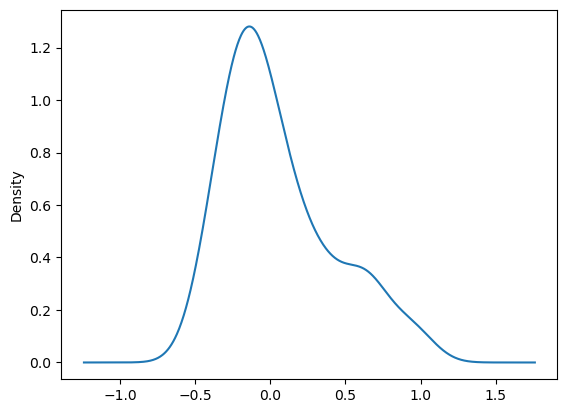

In [11]:
graph_df["No_Smoothing"].plot.kde()

In [12]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [13]:
# Shapiro–Wilk test
from scipy import stats

if(stats.shapiro( graph_df["No_Smoothing"])[1]>=0.05):
    print("By Shapiro Wilk test, It is normally distributed")
else:
    print("By Shapiro Wilk test, It is not normally distributed")
    
    

By Shapiro Wilk test, It is not normally distributed


<Axes: ylabel='Density'>

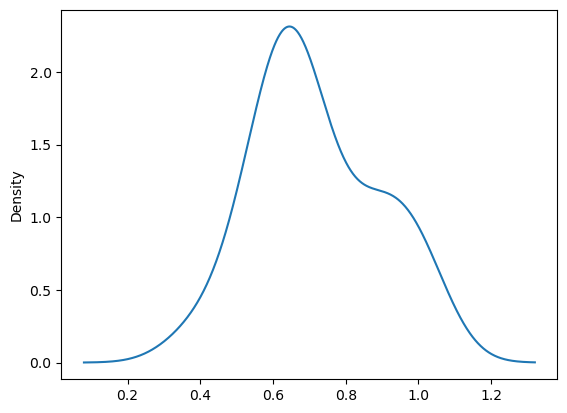

In [14]:
filtered_years=graph_df["No_Smoothing"].loc[graph_df["Year"]>=2000]
filtered_years.plot.kde()

In [15]:

if(stats.shapiro(filtered_years)[1]>=0.05):
    print("By Shapiro Wilk test, It is normally distributed")
else:
    print("By Shapiro Wilk test, It is not normally distributed")
    
    

By Shapiro Wilk test, It is normally distributed


In [16]:
print("Mean of the data :",filtered_years.mean())
print("Median of the data :", filtered_years.median())


Mean of the data : 0.7181818181818183
Median of the data : 0.67
